In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Least Square Data Fitting

In [3]:
fn='sample1.txt'
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])

62.99999999999999,9.326,219.8,60.7302
-2.7460541125541074 1.0633831168831152


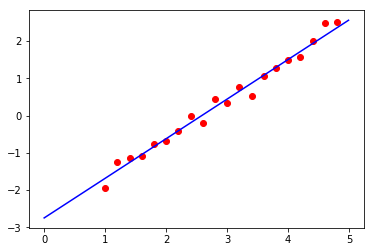

In [6]:
i=0
S,Sx,Sy,Sxx,Sxy=21,0,0,0,0
while (i<=20):
    Sx+=x[i]
    Sy+=y[i]
    Sxx+=x[i]**2
    Sxy+=x[i]*y[i]
    i+=1
    
print('{},{},{},{}'.format(Sx,Sy,Sxx,Sxy))
d=S*Sxx-Sx*Sx
a=(Sxx*Sy-Sx*Sxy)/d
b=(S*Sxy-Sx*Sy)/d

print(a,b)

t=np.arange(0,20)
plt.plot(x[t],y[t],'ro')
t=np.arange(0,5,0.01)
plt.plot(t,a+b*t,'b')

In [33]:
c=len(x)
A=np.vstack([x,np.ones(c)])

w=np.linalg.lstsq(A.T,y)[0]
print (w)

[ 1.06338312 -2.74605411]


c:\users\jhoon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [17]:
fn='sample2.txt'
x,y,s=np.loadtxt(fn,unpack=True,usecols=[0,1,2])

-1.598883749896493 1.0922703023838152 14.27730640158834


<ErrorbarContainer object of 3 artists>

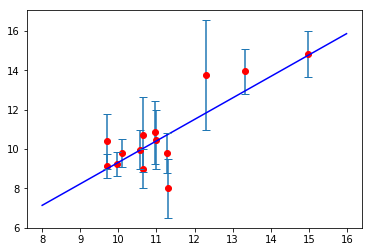

In [23]:
S=np.sum(1/s**2)
Sx=np.sum(x/s**2)
Sy=np.sum(y/s**2)
Sxx=np.sum(x**2/s**2)
Sxy=np.sum(x*y/s**2)

d=S*Sxx-Sx*Sx
a=(Sxx*Sy-Sx*Sxy)/d
b=(S*Sxy-Sx*Sy)/d

print(a,b,S)

t=np.arange(0,14)
plt.plot(x[t],y[t],'ro')
t=np.arange(8,16,0.01)
plt.plot(t,a+b*t,'b')
plt.errorbar(x,y,yerr=s,linestyle='None',capsize=4)

[ 0.07265593 -0.62309158  8.45152778]
[16.34895224]


<ErrorbarContainer object of 3 artists>

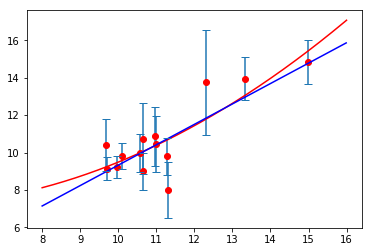

In [68]:
coeff, res, _, _, _=np.polyfit(x,y,2,full=True) 
print (coeff) 
print (res)
t=np.arange(8,16,0.001)
plt.plot(t,coeff[0]*(t**2)+coeff[1]*t+coeff[2],'r')

t=np.arange(0,14)
plt.plot(x[t],y[t],'ro')
t=np.arange(8,16,0.01)
plt.plot(t,a+b*t,'b')
plt.errorbar(x,y,yerr=s,linestyle='None',capsize=4)


In [2]:
from scipy.odr import *

Beta: [-2.31313334  1.16626907]
Beta Std Error: [1.59071243 0.1480994 ]
Beta Covariance: [[ 5.03161491 -0.46449248]
 [-0.46449248  0.04361448]]
Residual Variance: 0.5028934225201545
Inverse Condition #: 0.0011989563841730028
Reason(s) for Halting:
  Sum of squares convergence


<ErrorbarContainer object of 3 artists>

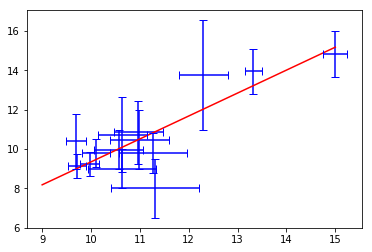

In [90]:
fn='MagellanTemp.txt'
x,y,xerr,yerr=np.loadtxt(fn,unpack=True,usecols=[0,1,2,3])

def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(x,y,sx=xerr,sy=yerr)

odr=ODR(data,lin_model,beta0=[0,1])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

t=np.arange(9,16)
plt.plot(t, -2.31313334+1.16626907*t,'r')
plt.errorbar(x,y,yerr=yerr,linestyle='none',capsize=4,ecolor='b')
plt.errorbar(x,y,xerr=xerr,linestyle='none',capsize=4,ecolor='b')


Beta: [997.52639797 855.81739306   2.16537577   1.40104049]
Beta Std Error: [ 2.22304667 32.13248298  0.06974434  0.04912568]
Beta Covariance: [[ 8.90373297e+00 -1.28345940e+00 -2.05731148e-02 -5.02878671e-02]
 [-1.28345940e+00  1.86021670e+03  2.42899381e-01 -1.11487083e+00]
 [-2.05731148e-02  2.42899381e-01  8.76380936e-03  2.33735015e-03]
 [-5.02878671e-02 -1.11487083e+00  2.33735015e-03  4.34802630e-03]]
Residual Variance: 0.5550409598589614
Inverse Condition #: 0.039093459029446664
Reason(s) for Halting:
  Sum of squares convergence


108.78802813235642

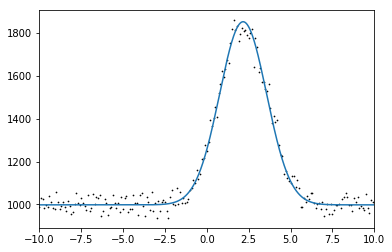

In [38]:
def gauss_func(p,x):
    xc=x-p[2]
    sig2=p[3]**2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

fn='fakedata.dat'
x,y,yerr=np.loadtxt(fn,unpack=True,usecols=[0,1,2])

model=Model(gauss_func)

data=RealData(x,y,sy=yerr)

odr=ODR(data,model,beta0=[1000,1000,2,1])
out=odr.run()
out.pprint()


plt.plot(x,y,'ko',ms=0.7)
t=np.arange(-10,10,0.001)
plt.plot(t,gauss_func(out.beta,t))
plt.xlim(-10,10)

out.sum_squre

Beta: [-0.0539518  -0.08611533  0.06536876  0.10573865 -0.06435696]
Beta Std Error: [0.00097419 0.00165684 0.00224056 0.00408214 0.00514948]
Beta Covariance: [[ 2.65063197e-05  1.03418186e-05 -4.33646516e-05 -6.95775783e-05
   5.89794024e-05]
 [ 1.03418186e-05  7.66699960e-05 -7.22913156e-05 -4.78735014e-05
   9.47902762e-05]
 [-4.33646516e-05 -7.22913156e-05  1.40209167e-04  1.11955873e-04
  -1.63305347e-04]
 [-6.95775783e-05 -4.78735014e-05  1.11955873e-04  4.65413784e-04
  -4.09985279e-04]
 [ 5.89794024e-05  9.47902762e-05 -1.63305347e-04 -4.09985279e-04
   7.40610252e-04]]
Residual Variance: 0.03580448460409932
Inverse Condition #: 0.06766428183336835
Reason(s) for Halting:
  Parameter convergence
[ 5.84076372  6.15610909  5.90049235  6.02671551  5.81055062  5.56149593
  5.38681715  5.33453263  5.32241869  4.75573061  5.102953    5.05014394
  4.57023779  4.17064546  3.81936791  3.94534811  3.71852248  3.3728725
  3.2163473   2.64994702  2.4340927   2.2339449   1.82303458  1.6516310

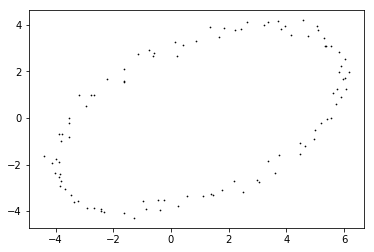

In [54]:
fn='ellipse.dat'
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])

def ellipse_func(p,x):
    t=p[0]*x[0]**2+p[1]*x[1]**2+p[2]*x[0]*x[1]+p[3]*x[0]+p[4]*x[1]+1
    return t

data=Data(np.row_stack([x,y]),1)
model=Model(ellipse_func,implicit=True)
odr=ODR(data,model,beta0=[1,1,1,1,1],maxit=100)

out=odr.run()

out.pprint()
plt.plot(x,y,'ko',ms=0.7)

print(x)